In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
images = []
ages = []
genders = []

for i in os.listdir('Data/crop_part1')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('C:/Users/lohit/Downloads/faceoriginal/Data/crop_part1/' + i))

In [4]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,100,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,101,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,0
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1


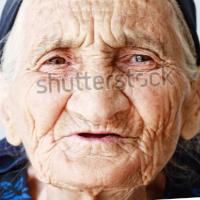

100 1


In [5]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])

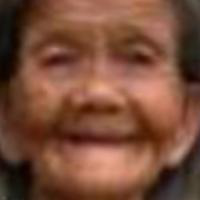

100 1


In [6]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])

In [7]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index = True)

In [8]:
df = df[df['Ages'] < 80]

In [9]:
df = df[df['Genders'] != 3]

In [10]:
import numpy as np
from PIL import Image

x = []
y = []

# Loop through the DataFrame without modifying it directly
for idx, row in df.iterrows():
    try:
        # Resize the image and convert to numpy array
        resized_image = row['Images'].resize((200, 200), Image.Resampling.LANCZOS)
        ar = np.asarray(resized_image)
        x.append(ar)
        
        # Collect labels (age and gender)
        age = int(row['Ages'])
        gender = int(row['Genders'])
        y.append([age, gender])
    except Exception as e:
        print(f"Error processing row {idx}: {e}")

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)


In [14]:
y_age = y[:, 0]
y_gender = y[:, 1] 

In [15]:
from sklearn.model_selection import train_test_split

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

In [17]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(Conv2D(64, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(Conv2D(128, (3, 3), activation='relu'))
agemodel.add(MaxPooling2D((2, 2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='linear'))  

agemodel.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2, 2)))
genmodel.add(Conv2D(64, (3, 3), activation='relu'))
genmodel.add(MaxPooling2D((2, 2)))
genmodel.add(Conv2D(128, (3, 3), activation='relu'))
genmodel.add(MaxPooling2D((2, 2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))  

genmodel.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])


In [18]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

C:\Users\lohit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 151s 903ms/step - loss: 540.6787 - val_loss: 342.9105
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - loss: 355.9102 - val_loss: 303.3923
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 157s 965ms/step - loss: 323.4411 - val_loss: 262.1225
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 939ms/step - loss: 280.7520 - val_loss: 216.7952
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 148s 907ms/step - loss: 260.7292 - val_loss: 229.9706
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 939ms/step - loss: 254.9321 - val_loss: 244.2692
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 893ms/step - loss: 250.0320 - val_loss: 213.4144
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 160s 984ms/step - loss: 245.0734 - val_loss: 198.5784
Epoch 9/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 160s 979ms/step - loss: 245.4093 - val_loss: 194.9447
Epoch 10/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - loss: 243.3903 - val_loss: 188.3704
Epoch 11/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - loss: 219

In [19]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=50, shuffle=True, validation_data=test2)

C:\Users\lohit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.5605 - loss: 0.6772 - val_accuracy: 0.7087 - val_loss: 0.5700
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.6825 - loss: 0.5898 - val_accuracy: 0.7733 - val_loss: 0.5130
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7270 - loss: 0.5509 - val_accuracy: 0.7748 - val_loss: 0.4949
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 529s 7s/step - accuracy: 0.7667 - loss: 0.5035 - val_accuracy: 0.7617 - val_loss: 0.4900
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7617 - loss: 0.4977 - val_accuracy: 0.8048 - val_loss: 0.4354
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.7851 - loss: 0.4657 - val_accuracy: 0.8063 - val_loss: 0.4180
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7846 - loss: 0.4698 - val_accuracy: 0.8140 - val_loss: 0.4251
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.7825 - loss: 0.4626 - val_accuracy: 0.8178 - v

In [20]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.Resampling.LANCZOS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.Resampling.LANCZOS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.Resampling.LANCZOS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300,300), Image.Resampling.LANCZOS)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Age: 66 
 Gender: male


C:\Users\lohit\AppData\Local\Temp\ipykernel_11952\2624513457.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age), '\n Gender:', gender)


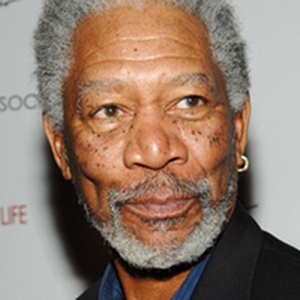

In [44]:
process_and_predict('B_old.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Age: 38 
 Gender: female


C:\Users\lohit\AppData\Local\Temp\ipykernel_11952\2624513457.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age), '\n Gender:', gender)


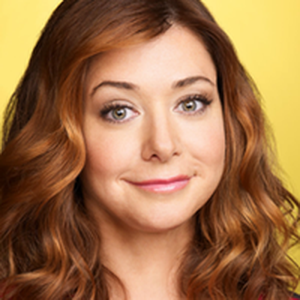

In [45]:
process_and_predict('G_mid.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Age: 15 
 Gender: male


C:\Users\lohit\AppData\Local\Temp\ipykernel_11952\2624513457.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age), '\n Gender:', gender)


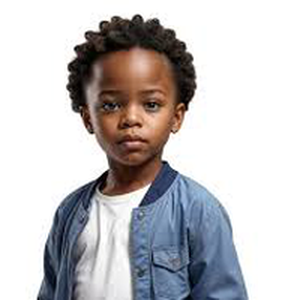

In [41]:
process_and_predict('B_kid.jpg')